## DOWLOAD DE BIBLIOTECAS

In [43]:

%pip install -r requirements.txt

Processing d:\home\ktietz\src\ci\alabaster_1611921544520\work (from -r requirements.txt (line 1))
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'D:\\home\\ktietz\\src\\ci\\alabaster_1611921544520\\work'



## EXPORTAÇÃO DE BIBLIOTECAS

In [1]:
# trabalhar com dados
import pandas as pd

# separação dos dados do dados para treinamento
from sklearn.model_selection import train_test_split

# avaliação de metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Importação da biblioteca para a criação do modelo de classificação
from sklearn.tree import DecisionTreeClassifier

# plotar gráficos
import matplotlib.pyplot as plt

## LEITURA DE DADOS E ORGANIZAÇÃO DOS MESMOS

### Leitura de dados:

In [2]:
dataset = pd.read_csv("palmerpenguins.csv")

### Mostrando como estão os dados antes de serem organizados

In [3]:
dataset.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE


### Convertendo os valores presentes na coluna 'island' para números inteiros, de acordo com o mapeamento

In [4]:
dataset['island'] = dataset['island'].replace({
    "Biscoe": 0,
    "Dream": 1,
    "Torgersen": 2
})

dataset['sex'] = dataset['sex'].replace({
    "FEMALE": 0,
    "MALE": 1
})

dataset['species'] = dataset['species'].replace({
    "Adelie": 0,
    "Chinstrap": 1,
    "Gentoo": 2
})

C:\Users\mathe\AppData\Local\Temp\ipykernel_17368\2478089743.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['island'] = dataset['island'].replace({
C:\Users\mathe\AppData\Local\Temp\ipykernel_17368\2478089743.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['sex'] = dataset['sex'].replace({
C:\Users\mathe\AppData\Local\Temp\ipykernel_17368\2478089743.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `res

### Reordenando as colunas do conjunto de dados

In [5]:
new_col_order = ['island', 'sex', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'species']
dataset = dataset.reindex(columns=new_col_order)

### Dados após ordenação

In [19]:
dataset.head()

,island,sex,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species
0,2,1,39.1,18.7,181,3750,0
1,2,0,39.5,17.4,186,3800,0
2,2,0,40.3,18.0,195,3250,0
3,2,0,36.7,19.3,193,3450,0
4,2,1,39.3,20.6,190,3650,0


## REALIZANDO O TREINAMENTO

### Separando o conjunto de dados em duas partes:  80% para treinamento e 20% para testes

In [7]:
X = dataset.drop(columns=['species']) # features
y = dataset['species'] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
print(f"Tamanho X de treino: {X_train.shape}")
print(f"Tamanho X de teste: {X_test.shape}")
print(f"Tamanho y de treino: {y_train.shape}")
print(f"Tamanho y de teste: {y_test.shape}")

Tamanho X de treino: (266, 6)
Tamanho X de teste: (67, 6)
Tamanho y de treino: (266,)
Tamanho y de teste: (67,)


### MODELO DE CLASSIFICAÇÃO ESCOLHIDO É O DECISION TREE (Árvore de Decisão)

In [8]:
# instanciando o modelo
tree = DecisionTreeClassifier()

### TREINANDO O MODELO

In [9]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

## AVALIAÇÃO DE MODELO

### PREVENDO VALORES

In [10]:
tree_pred = tree.predict(X_test)

### AVALIAÇÃO

In [11]:
tree_ava = classification_report(y_test, tree_pred)
print(tree_ava)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        39
           1       1.00      0.80      0.89        10
           2       1.00      1.00      1.00        18

    accuracy                           0.97        67
   macro avg       0.98      0.93      0.95        67
weighted avg       0.97      0.97      0.97        67



### ANALISANDO A ACURÁCIA POR MEIO DE GRÁFICOS

Pontuação de treinamento do modelo: 0.9701492537313433


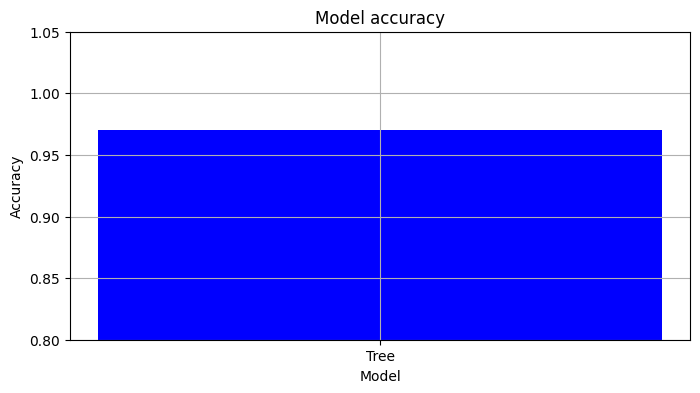

In [12]:
# prevendo valores
tree_predict = tree.predict(X_test)         

# avaliação
tree_score = accuracy_score(y_test, tree_predict)

print(f"Pontuação de treinamento do modelo: {tree_score}")

# gráfico
plt.figure(figsize = (8,4))
plt.title("Model accuracy")
plt.bar(x = [0], height = [tree_score], color = "blue")
plt.xticks([0], ["Tree"])
plt.ylim(0.8,1.05)
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.grid()
plt.show()

## TESTANDO O MODELO

### FAZENDO A ENTRADA DE DADOS PARA O TESTE

In [14]:
# Solicitação de entrada dos parâmetros
island = input("Digite o nome da ilha: ")
sex = input("Digite o sexo (M ou F): ")
culmen_length_mm = float(input("Digite o comprimento do culmen em milímetros: "))
culmen_depth_mm = float(input("Digite a profundidade do culmen em milímetros: "))
flipper_length_mm = float(input("Digite o comprimento da nadadeira em milímetros: "))
body_mass_g = float(input("Digite a massa corporal em gramas: "))

# Exibição dos parâmetros digitados
print("\nParâmetros:")
print("Ilha:", island)
print("Sexo:", sex)
print("Comprimento do culmen (mm):", culmen_length_mm)
print("Profundidade do culmen (mm):", culmen_depth_mm)
print("Comprimento da nadadeira (mm):", flipper_length_mm)
print("Massa corporal (g):", body_mass_g)



Parâmetros:
Ilha: 2
Sexo: 1
Comprimento do culmen (mm): 39.1
Profundidade do culmen (mm): 19.6
Comprimento da nadadeira (mm): 196.0
Massa corporal (g): 3750.0


### RELIZANDO A CLASSIFICAÇÃO

In [16]:
# Agrupando os dados fornecidos em uma variável
dados = [[island, sex, culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g]]

# Usando o modelo de classificador para fazer a classificação
output = tree.predict(dados)

# Exibindo o output da classificação
print(f"Resultado da classificação: {output}")


Resultado da classificação: [0]


c:\Users\mathe\anaconda3\envs\AG2\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
